[1, 2, 3] <class 'list'>

 SRC: 1 -> 2, 

 SRC: 2 -> 3, 

 SRC: 3 -> 1, 
None
Currently at vertex = 1
Currently at vertex = 2
Currently at vertex = 3
None
Vertex 2 visited from 1
Vertex 3 visited from 2
Vertex 1 visited from 3
None
0 0 0 0 

0 0 1 1 

0 1 0 1 

0 1 1 0 

Number of triangles in the given graph are 1
Runtime computed for numVertices = 2 is 0.0
Runtime computed for numVertices = 4 is 0.0
Runtime computed for numVertices = 8 is 0.0
Runtime computed for numVertices = 16 is 0.0
Runtime computed for numVertices = 32 is 0.031243085861206055
Runtime computed for numVertices = 64 is 0.20920968055725098
Runtime computed for numVertices = 128 is 1.683079719543457
Runtime computed for numVertices = 256 is 13.815321445465088
Runtime computed for numVertices = 512 is 102.11976480484009


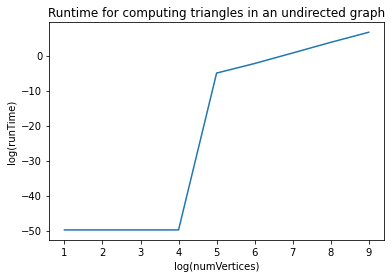

In [121]:
from collections import defaultdict
from queue import Queue
import numpy
import time
import math
import matplotlib.pyplot as plt

class Vertex:
    def __init__(self, key):
        self.id = key
        self.connectedTo = {}
    
    def addNeighbour(self, nbr, weight = 0):
        self.connectedTo[nbr] = weight
    
    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])
    
    def getConnections(self):
        return self.connectedTo.keys()
    
    def getId(self):
        return self.id
    
    def getWeight(self, nbr):
        return self.connectedTo[nbr]
    
class Graph:
    def __init__(self):
        self.vertexList = {}
        self.numVertices = 0
        self.adjMatrix = [[]]
        
    def addVertex(self, key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertexList[key] = newVertex
        return newVertex
    
    def __contains__(self, n):
        return n in self.vertexList
    
    def addEdge(self, src, dest, weight = 0):
        if src not in self.vertexList:
            nv = self.addVertex(src)
        if dest not in self.vertexList:
            nv = self.addVertex(dest)
            
        self.vertexList[src].addNeighbour(dest, weight)
    
    def getVertices(self):
        return self.vertexList.keys()
    
    def __iter__(self):
        """ Iterator for the vertices """
        return iter(self.vertexList.keys())
    
    def printAdjList(self):
        """ This prints the contents of the adjacency list"""
        for vertex in self.getVertices():
            print("\n SRC: {} -> ".format(vertex), end='')
            for neighbor in self.vertexList[vertex].getConnections():
                print(str(neighbor) + ', ')
    
    def printAdjMatrix(self):
        for vertex_1 in range(0, self.numVertices+1):
            for vertex_2 in range(0, self.numVertices+1):
                print(str(self.adjMatrix[vertex_1][vertex_2]), end=' ')
            print('\n')
        
    def BFS(self, src, visited):
        """ Perform BFS to iterate through the graph """
        q = Queue()
        q.put(src)
        while(not q.empty()):
            front = q.get()
            for vertex in self.vertexList[front].getConnections():
                if(visited[vertex] == False):
                    q.put(vertex)
                    visited[vertex] = True
                    print("Vertex {} visited from {}".format(vertex, front))
    
    def DFS(self, src, visited):
        """ Perform DFS to iterate through the graph """
        if(visited[src]):
            return
        visited[src] = True
        print("Currently at vertex = {}".format(src))
        for neighbor in self.vertexList[src].getConnections():
            if(visited[neighbor] == False):
                self.DFS(neighbor, visited)
    
    def convertListToMatrix(self):
        """ Convert the given adjacency list to a matrix """
        vertices = self.getVertices()
        self.adjMatrix = numpy.array([[0] * (self.numVertices + 1)] * (self.numVertices + 1))
        for vertex in vertices:
            #print("Vertex = {} and neighborCount = {}".format(vertex, len(self.vertexList[vertex].getConnections())))
            for neighbor in self.vertexList[vertex].getConnections():
                #print("Neighbor for vertex = {} is {}".format(vertex, neighbor))
                self.adjMatrix[vertex][neighbor] = 1
                self.adjMatrix[neighbor][vertex] = 1
                #print(self.adjMatrix)
        # Computed adjMatrix for this graph
        
    def computeTriangles_adjList(self):
        """ This function is used to compute the number of triangles using adjacency list representation """
        return
        
    def computeTriangles_adjMatrix(self):
        """
            Computes the number of triangles using the number of triangles
            in any given list
        """
        numVertices = len(self.adjMatrix)
        numTriangles = 0
        # Consider the fact that we have only certain vertices in the list of vertices
        for vertex_1 in range(1, numVertices):
            for vertex_2 in range(1, numVertices):
                for vertex_3 in range(1, numVertices):
                    if(vertex_1 != vertex_2 and vertex_2 != vertex_3 and vertex_1 != vertex_3 
                       and self.adjMatrix[vertex_1][vertex_2]
                       and self.adjMatrix[vertex_2][vertex_3]
                       and self.adjMatrix[vertex_3][vertex_1]):
                        numTriangles += 1
        
        # Counting the number of triangles through basic computation of 
        return numTriangles/6
    
    def DFSUtil(self, src, visited, dest):
        """ Check whether we have visited dest through DFS"""
        if(visited[src] == False and (dest == src)):
            return True
        visited[src] = True
        # neighbor is a node in the list of vertices
        for neighbor in self.vertexList[src].getConnections():
            if(visited[neighbor] == False):
                DFSUtil(self, neighbor, visited, dest)

        return False
    
    def doesPathExist(self, src, dest):
        """
            Computes whether a path exists between src and dest
            Args:
                src = source node
                dest = destination node
            Returns:
                True = Boolean
        """
        visited = defaultdict(bool)
        for vertex in self.vertexList:
            visited[vertex] = False
        
        # Thus, we compute that the DFS has been implemented
        return self.DFSUtil(src, visited, dest)

from networkx.generators.random_graphs import erdos_renyi_graph

def randomGraphGenerator(N, prob=0.5):
    """
        Generates random graphs
        Args:
            N = Number of vertices in the graph
            prob = Probability of the existence of an edge
        Returns:
            Edges of the graph
    """
    g = erdos_renyi_graph(N, prob)
    return g.edges
    
if __name__ == '__main__':
    #  
    G = Graph()
    edges = [(1, 2), (2, 3), (3, 1)]
    [G.addEdge(edge[0], edge[1]) for edge in edges]
    vertices = list(G.getVertices())
    print(vertices, type(vertices))
    print(G.printAdjList())
    visited = defaultdict(bool)
    for vertex in vertices:
        visited[vertex] = False
    
    # Testing out DFS code
    print(G.DFS(1, visited))
    for vertex in vertices:
        visited[vertex] = False
    
    # Testing out BFS code
    print(G.BFS(1, visited))
    # Converting this list to a matrix
    G.convertListToMatrix()
    numTrianglesMatrix = G.computeTriangles_adjMatrix()
    G.printAdjMatrix()
    print("Number of triangles in the given graph are {}".format(int(numTrianglesMatrix)))
    
    # Randomly created graph
    verticesList = [2**i for i in range(1, 10)]
    runTimesMatrix = defaultdict(float)
    runTimesList = defaultdict(float)
    for numVertices in verticesList:
        edges = randomGraphGenerator(numVertices, 0.5)
        G = Graph()
        for edge in edges:
            G.addEdge(edge[0], edge[1])
        G.convertListToMatrix()
        start_time = time.time()
        numTrianglesMatrix = G.computeTriangles_adjMatrix()
        end_time = time.time()
        runTimesMatrix[numVertices] = (end_time - start_time)
        print("Runtime computed for numVertices = {} is {}".format(numVertices, end_time-start_time))
    x, y = [], []
    for k, v in runTimesMatrix.items():
        x.append(math.log(k+1e-15)/math.log(2))
        y.append(math.log(v+1e-15)/math.log(2))
    
    plt.plot(x, y)
    plt.title('Runtime for computing triangles in an undirected graph')
    plt.xlabel('log(numVertices)')
    plt.ylabel('log(runTime)')

In [8]:
matrix = [[0] * 5] * 5
print(matrix)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


### Proof of solution for problem 2

In [ ]:
# Obtain the list of words
# Create a graph by connecting two words if they differ by only one letter
# Represent this graph as an adjacency list and compute whether a path exists using Depth First Search

from collections import defaultdict
import networkx
#from IPython.display import display
import ipycytoscape
import ipywidgets as widgets
from queue import Queue
import numpy
import time
import math
import matplotlib.pyplot as plt

class Vertex:
    def __init__(self, key):
        self.id = key
        self.connectedTo = {}
    
    def addNeighbour(self, nbr, weight = 0):
        self.connectedTo[nbr] = weight
    
    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])
    
    def getConnections(self):
        return self.connectedTo.keys()
    
    def getId(self):
        return self.id
    
    def getWeight(self, nbr):
        return self.connectedTo[nbr]
    
class Graph:
    def __init__(self):
        self.vertexList = {}
        self.numVertices = 0
        self.adjMatrix = [[]]
        
    def addVertex(self, key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertexList[key] = newVertex
        return newVertex
    
    def __contains__(self, n):
        return n in self.vertexList
    
    def addEdge(self, src, dest, weight = 0):
        if src not in self.vertexList:
            nv = self.addVertex(src)
        if dest not in self.vertexList:
            nv = self.addVertex(dest)
            
        self.vertexList[src].addNeighbour(dest, weight)
    
    def getVertices(self):
        return self.vertexList.keys()
    
    def __iter__(self):
        """ Iterator for the vertices """
        return iter(self.vertexList.keys())
    
    def printAdjList(self):
        """ This prints the contents of the adjacency list"""
        for vertex in self.getVertices():
            print("\n SRC: {} -> ".format(vertex), end='')
            for neighbor in self.vertexList[vertex].getConnections():
                print(str(neighbor) + ', ', end=' ')
    
    def printAdjMatrix(self):
        for vertex_1 in range(0, self.numVertices+1):
            for vertex_2 in range(0, self.numVertices+1):
                print(str(self.adjMatrix[vertex_1][vertex_2]), end=' ')
            print('\n')
        
    def BFS(self, src, visited):
        """ Perform BFS to iterate through the graph """
        q = Queue()
        q.put(src)
        while(not q.empty()):
            front = q.get()
            for vertex in self.vertexList[front].getConnections():
                if(visited[vertex] == False):
                    q.put(vertex)
                    visited[vertex] = True
                    print("Vertex {} visited from {}".format(vertex, front))
    
    def DFS(self, src, visited):
        """ Perform DFS to iterate through the graph """
        if(visited[src]):
            return
        visited[src] = True
        print("Currently at vertex = {}".format(src))
        for neighbor in self.vertexList[src].getConnections():
            if(visited[neighbor] == False):
                self.DFS(neighbor, visited)
    
    def convertListToMatrix(self):
        """ Convert the given adjacency list to a matrix """
        vertices = self.getVertices()
        self.adjMatrix = numpy.array([[0] * (self.numVertices + 1)] * (self.numVertices + 1))
        for vertex in vertices:
            #print("Vertex = {} and neighborCount = {}".format(vertex, len(self.vertexList[vertex].getConnections())))
            for neighbor in self.vertexList[vertex].getConnections():
                #print("Neighbor for vertex = {} is {}".format(vertex, neighbor))
                self.adjMatrix[vertex][neighbor] = 1
                self.adjMatrix[neighbor][vertex] = 1
                #print(self.adjMatrix)
        # Computed adjMatrix for this graph
        
    def computeTriangles_adjList(self):
        """ This function is used to compute the number of triangles using adjacency list representation """
        return
        
    def computeTriangles_adjMatrix(self):
        """
            Computes the number of triangles using the number of triangles
            in any given list
        """
        numVertices = len(self.adjMatrix)
        numTriangles = 0
        # Consider the fact that we have only certain vertices in the list of vertices
        for vertex_1 in range(1, numVertices):
            for vertex_2 in range(1, numVertices):
                for vertex_3 in range(1, numVertices):
                    if(vertex_1 != vertex_2 and vertex_2 != vertex_3 and vertex_1 != vertex_3 
                       and self.adjMatrix[vertex_1][vertex_2]
                       and self.adjMatrix[vertex_2][vertex_3]
                       and self.adjMatrix[vertex_3][vertex_1]):
                        numTriangles += 1
        
        # Counting the number of triangles through basic computation of 
        return numTriangles/6
    
    def DFSUtil(self, src, visited, dest):
        """ Check whether we have visited dest through DFS"""
        if(visited[src] == False and (dest == src)):
            return True
        result = False
        visited[src] = True
        # neighbor is a node in the list of vertices
        for neighbor in self.vertexList[src].getConnections():
            if(visited[neighbor] == False):
                result = result | self.DFSUtil(neighbor, visited, dest)
        visited[src] = False
        return result
    
    def doesPathExist(self, src, dest):
        """
            Computes whether a path exists between src and dest
            Args:
                src = source node
                dest = destination node
            Returns:
                True = Boolean
        """
        visited = defaultdict(bool)
        for vertex in self.vertexList.keys():
            visited[vertex] = False
        
        # Thus, we compute that the DFS has been implemented
        return self.DFSUtil(src, visited, dest)


def countMismatch(word1, word2):
    """
        Returns the number of mismatches between the given words
        Args:
            word1, word2 - Two words to be compared
        Returns:
            Number of mismatches between the given words
    """
    #assert(len(word1) == len(word2), "Lengths of the word {} and {} aren't same".format(word1, word2))
    numMismatch = 0
    for i in range(len(word1)):
        if(word1[i] != word2[i]):
            numMismatch += 1
    return numMismatch

def findWordsDifferingByOneLetter(root, dictionary):
    """
        Args:
            Word - Word which is the current root
            Dictionary - List of all words
        Returns:
            Similar - List of words with difference between "word" and element being 1 character
    """
    result = []
    for word in dictionary:
        count = countMismatch(word, root)
        if(count == 1):
            result.append(word)
    return result
        
# Function to build a graph with the given list of words
def buildGraph(dictionary):
    """
        Args:
            word - Word is the current root
            dictionary - List of all words
        Returns:
            Graph - Graph object that's having all these edges
    """
    d = defaultdict(list)
    g = Graph()
    edges = []
    print(dictionary)
    for word in dictionary:
        differingWords = findWordsDifferingByOneLetter(word, dictionary)
        d[word] = differingWords
        for w in differingWords:
            g.addEdge(word, w)
    return g

# We have entered the control flow for the "main" function
if __name__ == '__main__':
    dictionary = ["SHOW", "SLOW", "STOW", "STOP", "SHOP", "SLOP", "CHOP", "CROP", "DROP", "CLOP", "COOP", "COOL", "TOOL", "TOLL", "TELL"]
    g = buildGraph(dictionary)
    print(g.printAdjList())
    srcDestPairs = [("SHOW", "TELL"), ("TOOL", "DROP"), ("CLOP", "TELL")]
    for val in srcDestPairs:
        src, dest = val[0], val[1]
        if(g.doesPathExist(src, dest)):
            print("Path found between {} and {}".format(src, dest))
        else:
            print("Path not found between {} and {}".format(src, dest))
    """
    G = networkx.Graph()
    G.add_nodes_from(dictionary)
    d = defaultdict(list)
    g = Graph()
    edges = []
    print(dictionary)
    for word in dictionary:
        differingWords = findWordsDifferingByOneLetter(word, dictionary)
        d[word] = differingWords
        for w in differingWords:
            G.add_edges_from([(word, w), (w, word)])
    print(G.nodes, G.edges)
    undirected = ipycytoscape.CytoscapeWidget()
    undirected.graph.add_graph_from_networkx(G)
    display(cyto)
    """
    G = nx.complete_graph(5)
    undirected = ipycytoscape.CytoscapeWidget()
    undirected.graph.add_graph_from_networkx(G)
    display(undirected)


Text(0, 0.5, 'log(runTime)')

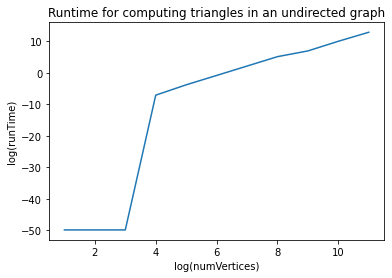

In [72]:
# Runtime computed for numVertices = 2 is 0.0
# Runtime computed for numVertices = 4 is 0.0
# Runtime computed for numVertices = 8 is 0.0
# Runtime computed for numVertices = 16 is 0.00718235969543457
# Runtime computed for numVertices = 32 is 0.0698537826538086
# Runtime computed for numVertices = 64 is 0.5458383560180664
# Runtime computed for numVertices = 128 is 4.303053855895996
# Runtime computed for numVertices = 256 is 33.97646379470825
# Runtime computed for numVertices = 512 is 119.82388305664062
# Runtime computed for numVertices = 1024 is 998.2100055217743
# Runtime computed for numVertices = 2048 is 7245.433933734894

x = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
y = [0.0, 0.0, 0.0, 0.00718235969543457, 0.0698537826538086, 0.5458383560180664,\
     4.303053855895996, 33.97646379470825, 119.82388305664062, 998.2100055217743, 7245.433933734894]
x_1 = [math.log2(val+1e-15) for val in x]
y_1 = [math.log2(val+1e-15) for val in y]
plt.plot(x_1, y_1)
plt.title('Runtime for computing triangles in an undirected graph')
plt.xlabel('log(numVertices)')
plt.ylabel('log(runTime)')

In [ ]:
if __name__ == '__main__':
    # Randomly created graph
    verticesList = [2**i for i in range(1, 11)]
    
    runTimesMatrix = defaultdict(float)
    #runTimesList = defaultdict(float)
    for numVertices in verticesList:
        #edges = randomGraphGenerator(numVertices, 0.5)
        G = Graph()
        g = networkx.algorithms.bipartite.generators.gnmk_random_graph(numVertices, numVertices, numVertices*numVertices)
        for edge in g.edges:
            G.addEdge(edge[0], edge[1])
        G.convertListToMatrix()
        start_time = time.time()
        numTrianglesMatrix = G.computeTriangles_adjMatrix()
        end_time = time.time()
        runTimesMatrix[numVertices] = (end_time - start_time)
        print("Runtime computed for numVertices = {} is {}".format(numVertices, end_time-start_time))
    x, y = [], []
    for k, v in runTimesMatrix.items():
        x.append(math.log(k+1e-15)/math.log(2))
        y.append(math.log(v+1e-15)/math.log(2))
    
    plt.plot(x, y)
    plt.title('Runtime for computing triangles in an undirected graph')
    plt.xlabel('log(numVertices)')
    plt.ylabel('log(runTime)')

Runtime computed for numVertices = 2 is 0.0
Runtime computed for numVertices = 4 is 0.0
Runtime computed for numVertices = 8 is 0.0
Runtime computed for numVertices = 16 is 0.037825822830200195
Runtime computed for numVertices = 32 is 0.200453519821167
Runtime computed for numVertices = 64 is 1.6104564666748047
Runtime computed for numVertices = 128 is 12.703569173812866
Runtime computed for numVertices = 256 is 91.13941550254822


Text(0, 0.5, 'log(runTime)')

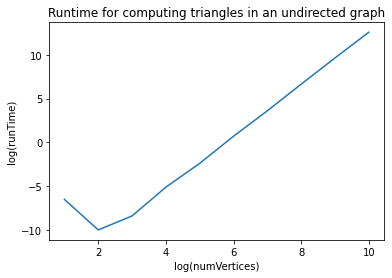

In [120]:
# Runtime computed for numVertices = 2 is 0.01108551025390625
# Runtime computed for numVertices = 4 is 0.0009930133819580078
# Runtime computed for numVertices = 8 is 0.002993345260620117
# Runtime computed for numVertices = 16 is 0.029107093811035156
# Runtime computed for numVertices = 32 is 0.19097352027893066
# Runtime computed for numVertices = 64 is 1.628605604171753
# Runtime computed for numVertices = 128 is 12.14514970779419
# Runtime computed for numVertices = 256 is 99.50739574432373
# Runtime computed for numVertices = 512 is 791.0374956130981
# Runtime computed for numVertices = 1024 is 6030.4338364601135

x = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
y = [0.01108551025390625, 0.0009930133819580078, 0.002993345260620117, 0.029107093811035156, \
     0.19097352027893066, 1.628605604171753, 12.14514970779419, 99.50739574432373, 791.0374956130981, 6030.4338364601135]
x_1 = [math.log2(val+1e-15) for val in x]
y_1 = [math.log2(val+1e-15) for val in y]
plt.plot(x_1, y_1)
plt.title('Runtime for computing triangles in an undirected graph')
plt.xlabel('log(numVertices)')
plt.ylabel('log(runTime)')